In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
os.chdir("/home/astridkd/JSP_misc/mutational_signatures/Til_Astrid/Data")

In [3]:
data = pd.read_csv("Signatures_all_samples.tsv", sep='\t')

In [4]:
data

,Donor_ID,Sample_ID,Signature.1,Signature.18,Signature.17,Signature.MMR1,Signature.2,Signature.MMR2,Signature.5,Signature.8,...,Signature.14,Signature.15,Signature.20,Signature.21,Signature.23,Signature.25,Signature.26,Signature.27,Signature.28,Signature.29
0,DO217850,SA542535,866.7591,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000
1,DO217864,SA542560,2576.7410,2678.4280,524.913892,0.0,1393.069118,0.0,427.839208,830.689936,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000
2,DO218139,SA543057,545.0168,0.0000,0.000000,0.0,1273.913565,0.0,336.628000,347.550698,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000
3,DO218227,SA543206,0.0000,0.0000,0.000000,0.0,8249.377950,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000
4,DO218351,SA543433,1444.8000,1382.8300,225.502494,0.0,0.000000,0.0,183.799306,508.354657,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,CPCT02070347,CPCT02070347T,1846.1040,401.0188,0.000000,0.0,5309.448000,0.0,0.000000,923.052000,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000
6090,CPCT02090030,CPCT02090030T,1366.5720,5016.3120,0.000000,0.0,2204.978000,0.0,0.000000,466.117500,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000
6091,CPCT02100157,CPCT02100157T,2294.0810,435.0755,0.000000,0.0,451.074700,0.0,785.509900,630.678800,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000
6092,CPCT02330117,CPCT02330117T,2005.3960,203.8171,0.000000,0.0,838.312900,0.0,834.216100,283.705200,...,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.000


In [56]:
df_tissue = pd.read_csv("Cancertypes_jan2021.tsv", sep='\t')

In [57]:
df_tissue

,Donor_ID,cancertype,primaryTumorLocation,Study
0,DO804,Bladder Urothelial Cancer,Bladder,PCAWG
1,DO804,Bladder Urothelial Cancer,Bladder,PCAWG
2,DO804,Bladder Urothelial Cancer,Bladder,PCAWG
3,DO555,Bladder Urothelial Cancer,Bladder,PCAWG
4,DO555,Bladder Urothelial Cancer,Bladder,PCAWG
...,...,...,...,...
10164,DRUP01010035,Head and neck Salivary Gland,Head and neck,HMF
10165,DRUP01050010,Head and neck Nasal cavity and paranasal sinuses,Head and neck,HMF
10166,DRUP01090012,Bone/Soft tissue Gastrointestinal stromal tumo...,Bone/Soft tissue,HMF
10167,CPCT02030259,Ovary Cancer,Ovary,HMF


In [58]:
df_tissue['Donor_ID'] = df_tissue['Donor_ID'] + 'T' # make identical names

In [59]:
df_tissue

,Donor_ID,cancertype,primaryTumorLocation,Study
0,DO804T,Bladder Urothelial Cancer,Bladder,PCAWG
1,DO804T,Bladder Urothelial Cancer,Bladder,PCAWG
2,DO804T,Bladder Urothelial Cancer,Bladder,PCAWG
3,DO555T,Bladder Urothelial Cancer,Bladder,PCAWG
4,DO555T,Bladder Urothelial Cancer,Bladder,PCAWG
...,...,...,...,...
10164,DRUP01010035T,Head and neck Salivary Gland,Head and neck,HMF
10165,DRUP01050010T,Head and neck Nasal cavity and paranasal sinuses,Head and neck,HMF
10166,DRUP01090012T,Bone/Soft tissue Gastrointestinal stromal tumo...,Bone/Soft tissue,HMF
10167,CPCT02030259T,Ovary Cancer,Ovary,HMF


In [60]:
# Merge with tissue based on Sample_ID, only HMF matches
data_merged = pd.merge(data, df_tissue, left_on='Sample_ID', right_on='Donor_ID', how='inner')

In [61]:
data_merged

,Donor_ID_x,Sample_ID,Signature.1,Signature.18,Signature.17,Signature.MMR1,Signature.2,Signature.MMR2,Signature.5,Signature.8,...,Signature.23,Signature.25,Signature.26,Signature.27,Signature.28,Signature.29,Donor_ID_y,cancertype,primaryTumorLocation,Study
0,CPCT02030502,CPCT02030502T,319.004253,408.225755,0.00000,0.000000,323.490250,0.0,1102.558448,1287.979670,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02030502T,Adrenal Cancer,Adrenal,HMF
1,CPCT02050229,CPCT02050229T,322.369457,0.000000,0.00000,0.000000,62.739625,0.0,0.000000,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02050229T,Adrenal Pheochromocytoma,Adrenal,HMF
2,CPCT02070337,CPCT02070337T,0.000000,0.000000,0.00000,0.000000,281.538114,0.0,0.000000,1767.349167,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02070337T,Adrenal Cancer,Adrenal,HMF
3,CPCT02120018,CPCT02120018T,998.321751,0.000000,0.00000,0.000000,1094.022579,0.0,1128.537632,290.240216,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02120018T,Adrenal Cancer,Adrenal,HMF
4,CPCT02010377,CPCT02010377T,264.995813,643.063148,542.55247,752.647882,872.596401,0.0,1641.361574,1121.561284,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02010377T,Biliary Gall bladder,Biliary,HMF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,CPCT02070347,CPCT02070347T,1846.104000,401.018800,0.00000,0.000000,5309.448000,0.0,0.000000,923.052000,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02070347T,Vulva Cancer,Vulva,HMF
3513,CPCT02090030,CPCT02090030T,1366.572000,5016.312000,0.00000,0.000000,2204.978000,0.0,0.000000,466.117500,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02090030T,Vulva Cancer,Vulva,HMF
3514,CPCT02100157,CPCT02100157T,2294.081000,435.075500,0.00000,0.000000,451.074700,0.0,785.509900,630.678800,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02100157T,Vulva Squamous cell carcinoma in the vagina,Vulva,HMF
3515,CPCT02330117,CPCT02330117T,2005.396000,203.817100,0.00000,0.000000,838.312900,0.0,834.216100,283.705200,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02330117T,Vulva Cancer,Vulva,HMF


In [62]:
data_merged.max()

Donor_ID_x               DRUP01440001
Sample_ID               DRUP01440001T
Signature.1             388456.310926
Signature.18             41933.385388
Signature.17             92525.399826
                            ...      
Signature.29                 4859.269
Donor_ID_y              DRUP01440001T
cancertype               Vulva Vagina
primaryTumorLocation            Vulva
Study                             HMF
Length: 92, dtype: object

In [63]:
# variances for each feature
variance = data_merged.iloc[:,2:-4].var()
variance

Signature.1       1.006479e+08
Signature.18      6.346408e+06
Signature.17      3.484855e+07
Signature.MMR1    1.089894e+08
Signature.2       4.260732e+07
                      ...     
Signature.25      1.248300e+04
Signature.26      8.601234e+04
Signature.27      1.802143e+04
Signature.28      7.427730e+04
Signature.29      2.410239e+04
Length: 86, dtype: float64

In [64]:
# add to df
variance_row = pd.DataFrame([variance], index=["variance"])
data_var = pd.concat([data_merged, variance_row], axis=0)
data_var

,Donor_ID_x,Sample_ID,Signature.1,Signature.18,Signature.17,Signature.MMR1,Signature.2,Signature.MMR2,Signature.5,Signature.8,...,Signature.23,Signature.25,Signature.26,Signature.27,Signature.28,Signature.29,Donor_ID_y,cancertype,primaryTumorLocation,Study
0,CPCT02030502,CPCT02030502T,3.190043e+02,4.082258e+02,0.000000e+00,0.000000e+00,3.234902e+02,0.000000e+00,1.102558e+03,1.287980e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CPCT02030502T,Adrenal Cancer,Adrenal,HMF
1,CPCT02050229,CPCT02050229T,3.223695e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.273963e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CPCT02050229T,Adrenal Pheochromocytoma,Adrenal,HMF
2,CPCT02070337,CPCT02070337T,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.815381e+02,0.000000e+00,0.000000e+00,1.767349e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CPCT02070337T,Adrenal Cancer,Adrenal,HMF
3,CPCT02120018,CPCT02120018T,9.983218e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.094023e+03,0.000000e+00,1.128538e+03,2.902402e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CPCT02120018T,Adrenal Cancer,Adrenal,HMF
4,CPCT02010377,CPCT02010377T,2.649958e+02,6.430631e+02,5.425525e+02,7.526479e+02,8.725964e+02,0.000000e+00,1.641362e+03,1.121561e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CPCT02010377T,Biliary Gall bladder,Biliary,HMF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,CPCT02090030,CPCT02090030T,1.366572e+03,5.016312e+03,0.000000e+00,0.000000e+00,2.204978e+03,0.000000e+00,0.000000e+00,4.661175e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CPCT02090030T,Vulva Cancer,Vulva,HMF
3514,CPCT02100157,CPCT02100157T,2.294081e+03,4.350755e+02,0.000000e+00,0.000000e+00,4.510747e+02,0.000000e+00,7.855099e+02,6.306788e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CPCT02100157T,Vulva Squamous cell carcinoma in the vagina,Vulva,HMF
3515,CPCT02330117,CPCT02330117T,2.005396e+03,2.038171e+02,0.000000e+00,0.000000e+00,8.383129e+02,0.000000e+00,8.342161e+02,2.837052e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,CPCT02330117T,Vulva Cancer,Vulva,HMF
3516,DRUP01090019,DRUP01090019T,2.518743e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.692963e+02,0.000000e+00,0.000000e+00,2.686458e+03,...,821.449800,0.000000,0.000000,0.000000,0.000000,1043.559000,DRUP01090019T,Vulva Vagina,Vulva,HMF


In [65]:
top_30_columns = data_var.iloc[-1].sort_values(ascending=False).head(30)

In [38]:
top_30_columns

Signature.7           2465931588.610723
del.rep                318289221.755408
Signature.4            138518860.768672
Signature.10            132219152.63082
Signature.MMR1         108989393.646978
Signature.14           103251283.242932
Signature.1            100647890.460717
Signature.11            66282839.455436
Signature.2              42607315.52007
Signature.30            39304631.407626
Signature.17            34848548.348206
ins                     34431326.523189
Signature.13            20352418.413833
Signature.5              8093633.995928
Signature.18             6346408.318627
Signature.3              5395116.404535
Signature.MMR2           4997625.229425
Signature.N2             4133245.630429
Signature.8              3864838.144714
Signature.6              3734493.243049
Signature.15             2673806.846347
Signature.33             1947180.966576
Signature.21             1492816.309003
Signature.12             1076756.378613
Signature.N10             954450.758517


Order for all data (including PCAWG)

Signature.10
Signature.7 
del.rep               
Signature.MMR1          
Signature.4 

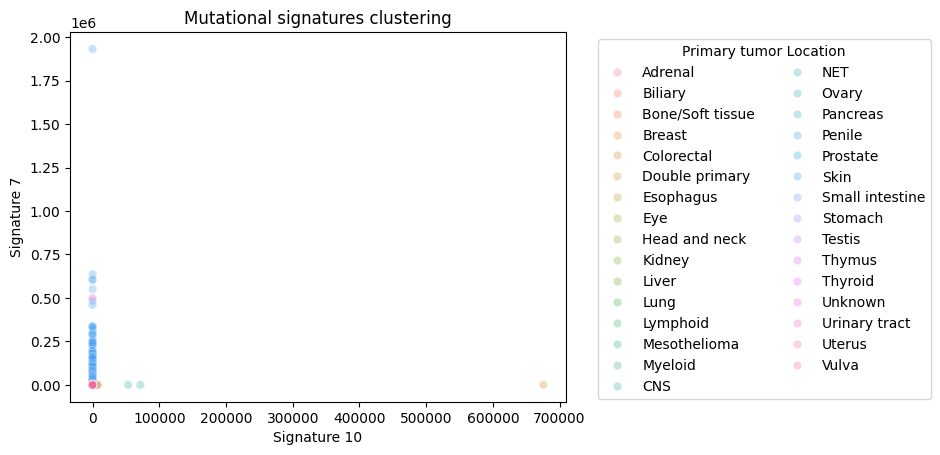

In [44]:
# plot mut signatures
sns.scatterplot(data=data_merged, x='Signature.10', y='Signature.7', hue='primaryTumorLocation', alpha=0.3)
plt.xlabel('Signature 10')
plt.ylabel('Signature 7')
plt.title('Mutational signatures clustering')
plt.legend(title='Primary tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

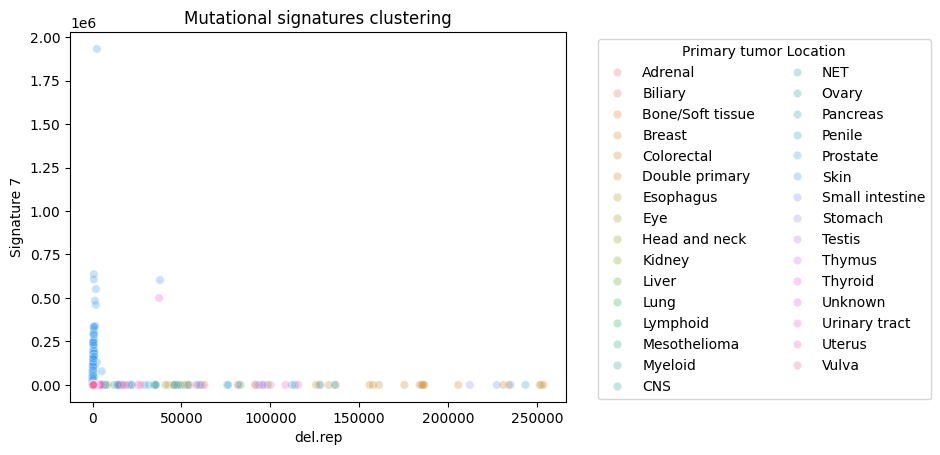

In [45]:
# plot mut signatures
sns.scatterplot(data=data_merged, x='del.rep', y='Signature.7', hue='primaryTumorLocation', alpha=0.3)
plt.xlabel('del.rep')
plt.ylabel('Signature 7')
plt.title('Mutational signatures clustering')
plt.legend(title='Primary tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

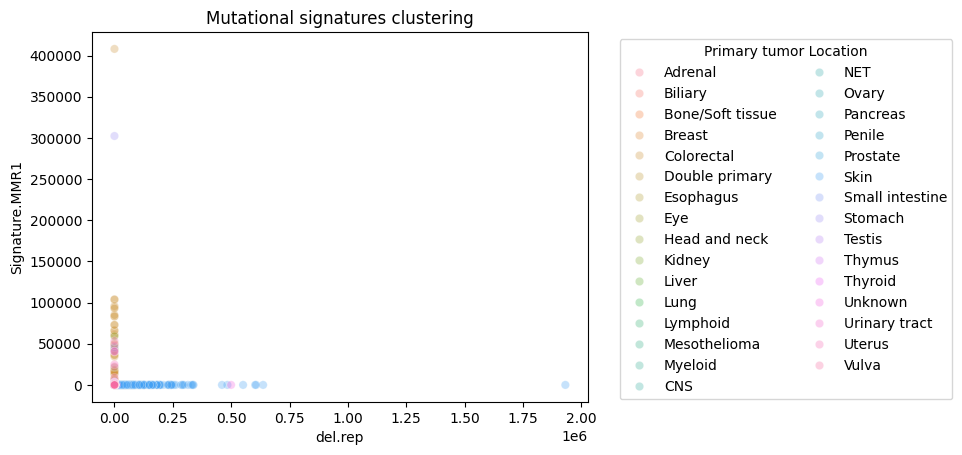

In [46]:
# plot mut signatures
sns.scatterplot(data=data_merged, x='Signature.7', y='Signature.MMR1', hue='primaryTumorLocation', alpha=0.3)
plt.xlabel('del.rep')
plt.ylabel('Signature.MMR1')
plt.title('Mutational signatures clustering')
plt.legend(title='Primary tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

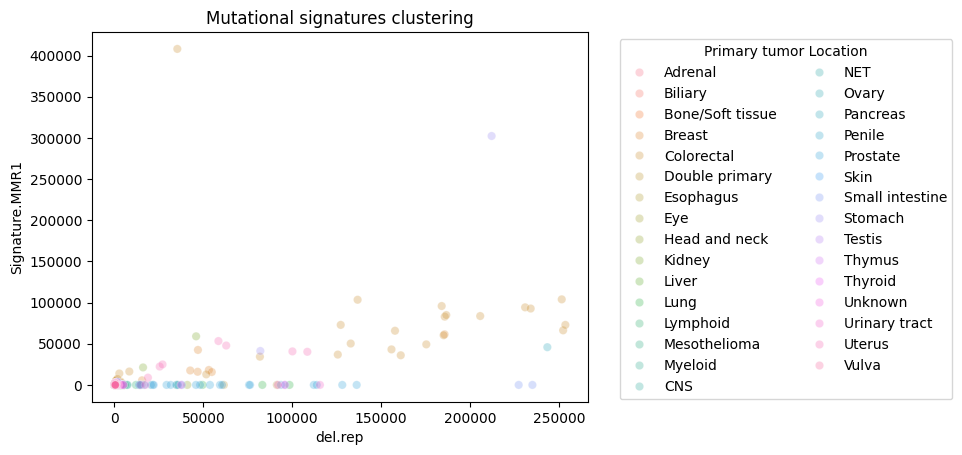

In [47]:
# plot mut signatures
sns.scatterplot(data=data_merged, x='del.rep', y='Signature.MMR1', hue='primaryTumorLocation', alpha=0.3)
plt.xlabel('del.rep')
plt.ylabel('Signature.MMR1')
plt.title('Mutational signatures clustering')
plt.legend(title='Primary tumor Location', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.show()

In [40]:
data_merged

,Donor_ID_x,Sample_ID,Signature.1,Signature.18,Signature.17,Signature.MMR1,Signature.2,Signature.MMR2,Signature.5,Signature.8,...,Signature.23,Signature.25,Signature.26,Signature.27,Signature.28,Signature.29,Donor_ID_y,cancertype,primaryTumorLocation,Study
0,CPCT02030502,CPCT02030502T,319.004253,408.225755,0.00000,0.000000,323.490250,0.0,1102.558448,1287.979670,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02030502T,Adrenal Cancer,Adrenal,HMF
1,CPCT02050229,CPCT02050229T,322.369457,0.000000,0.00000,0.000000,62.739625,0.0,0.000000,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02050229T,Adrenal Pheochromocytoma,Adrenal,HMF
2,CPCT02070337,CPCT02070337T,0.000000,0.000000,0.00000,0.000000,281.538114,0.0,0.000000,1767.349167,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02070337T,Adrenal Cancer,Adrenal,HMF
3,CPCT02120018,CPCT02120018T,998.321751,0.000000,0.00000,0.000000,1094.022579,0.0,1128.537632,290.240216,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02120018T,Adrenal Cancer,Adrenal,HMF
4,CPCT02010377,CPCT02010377T,264.995813,643.063148,542.55247,752.647882,872.596401,0.0,1641.361574,1121.561284,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02010377T,Biliary Gall bladder,Biliary,HMF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,CPCT02070347,CPCT02070347T,1846.104000,401.018800,0.00000,0.000000,5309.448000,0.0,0.000000,923.052000,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02070347T,Vulva Cancer,Vulva,HMF
3513,CPCT02090030,CPCT02090030T,1366.572000,5016.312000,0.00000,0.000000,2204.978000,0.0,0.000000,466.117500,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02090030T,Vulva Cancer,Vulva,HMF
3514,CPCT02100157,CPCT02100157T,2294.081000,435.075500,0.00000,0.000000,451.074700,0.0,785.509900,630.678800,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02100157T,Vulva Squamous cell carcinoma in the vagina,Vulva,HMF
3515,CPCT02330117,CPCT02330117T,2005.396000,203.817100,0.00000,0.000000,838.312900,0.0,834.216100,283.705200,...,0.0000,0.0,0.0,0.0,0.0,0.000,CPCT02330117T,Vulva Cancer,Vulva,HMF


In [5]:
# remove non-features or tissue
data_merged_toKNN = data_merged.iloc[:,2:-4]
data_merged_toKNN

NameError: name 'data_merged' is not defined

In [68]:
data_merged_toKNN['primaryTumorLocation'] = data_merged['primaryTumorLocation']
data_merged_toKNN

,Signature.1,Signature.18,Signature.17,Signature.MMR1,Signature.2,Signature.MMR2,Signature.5,Signature.8,Signature.13,Signature.3,...,Signature.15,Signature.20,Signature.21,Signature.23,Signature.25,Signature.26,Signature.27,Signature.28,Signature.29,primaryTumorLocation
0,319.004253,408.225755,0.00000,0.000000,323.490250,0.0,1102.558448,1287.979670,1841.751115,1964.368375,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000,Adrenal
1,322.369457,0.000000,0.00000,0.000000,62.739625,0.0,0.000000,0.000000,56.618686,280.032962,...,0.0,0.0,91.304008,0.0000,0.0,0.0,0.0,0.0,0.000,Adrenal
2,0.000000,0.000000,0.00000,0.000000,281.538114,0.0,0.000000,1767.349167,475.317500,1983.955968,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000,Adrenal
3,998.321751,0.000000,0.00000,0.000000,1094.022579,0.0,1128.537632,290.240216,0.000000,249.449699,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000,Adrenal
4,264.995813,643.063148,542.55247,752.647882,872.596401,0.0,1641.361574,1121.561284,220.262272,262.195048,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000,Biliary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3512,1846.104000,401.018800,0.00000,0.000000,5309.448000,0.0,0.000000,923.052000,5423.880000,538.236000,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000,Vulva
3513,1366.572000,5016.312000,0.00000,0.000000,2204.978000,0.0,0.000000,466.117500,2166.135000,705.229700,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000,Vulva
3514,2294.081000,435.075500,0.00000,0.000000,451.074700,0.0,785.509900,630.678800,376.239600,309.146200,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000,Vulva
3515,2005.396000,203.817100,0.00000,0.000000,838.312900,0.0,834.216100,283.705200,391.759000,1041.106000,...,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000,Vulva


In [69]:
# save to file for KNN
data_merged_toKNN.to_csv('mutsig.tsv', sep='\t', index=False)

PCA of mutational signatures

In [67]:
# remove non-number columns
df_toPCA = data_merged.select_dtypes(include=['number'])

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_toPCA)

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5) 
pca_result_scaled = pca.fit_transform(df_scaled)

In [44]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.15351073 0.06479474 0.05011158 0.04365492 0.03998571]


In [45]:
# make df and combine by index
pca_result_df = pd.DataFrame(pca_result_scaled, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])

In [47]:
pca_result_df['primaryTumorLocation'] = data_merged['primaryTumorLocation']

In [48]:
pca_result_df

,PC1,PC2,PC3,PC4,PC5,primaryTumorLocation
0,-0.587478,-0.699100,0.132291,-0.260784,-0.270820,Adrenal
1,-3.544079,-1.003841,0.117836,-0.245133,-0.054138,Adrenal
2,-0.126175,-0.388507,0.297858,-0.271887,-0.248365,Adrenal
3,3.551962,-4.491536,3.697509,2.318935,-0.793973,Adrenal
4,-1.436476,-0.362795,-0.423365,-0.320528,0.008035,Biliary
...,...,...,...,...,...,...
3512,-2.223845,-0.079951,-0.220322,-0.181510,-0.026572,Vulva
3513,-0.970872,0.661264,-0.778196,-0.654176,-0.194832,Vulva
3514,-2.583237,-0.659835,0.212894,-0.169767,-0.099508,Vulva
3515,0.150387,-0.154573,-0.216995,-0.616399,-0.019198,Vulva


In [49]:
# save to file for KNN
pca_result_df.to_csv('PCs_mutsig.tsv', sep='\t', index=False)